In [1]:
from tensorflow.keras.datasets import cifar10

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()

In [5]:
X_train.shape,Y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [6]:
X_test.shape,Y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [7]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
def plot_img(img):
    plt.imshow(img.reshape(32,32,3))
    plt.show()

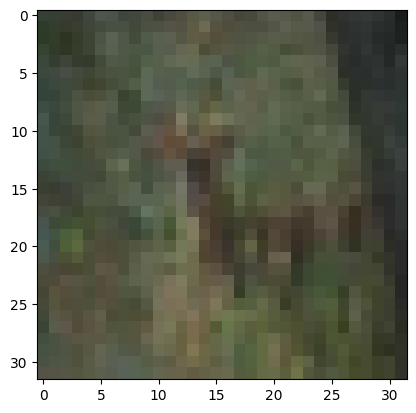

In [9]:
plot_img(X_train[10])

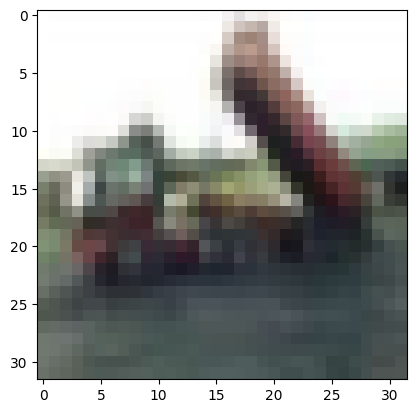

In [10]:
plot_img(X_train[2])

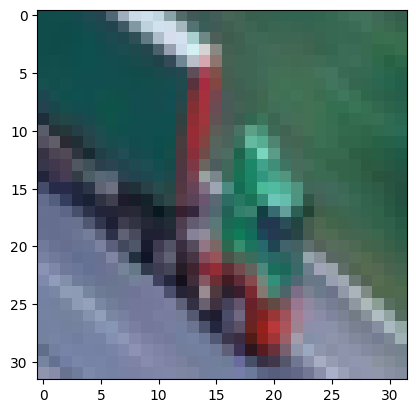

In [11]:
plot_img(X_train[50])

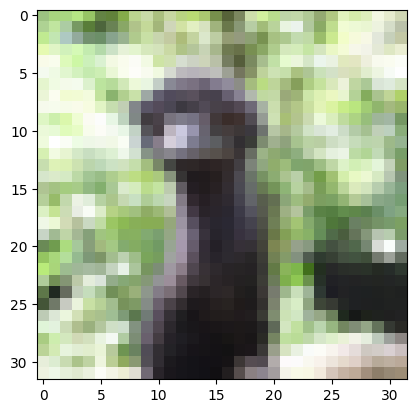

In [12]:
plot_img(X_train[55])

In [14]:
from tensorflow.keras import Sequential # we want to create sequential model

In [15]:
from tensorflow.keras.layers import Dense # fully connected layer

In [16]:
from tensorflow.keras.layers import Convolution2D , MaxPooling2D,Flatten

In [17]:
model = Sequential()

In [18]:
model.add(Convolution2D(32,(3,3),activation = 'relu',input_shape = (32,32,3)))
model.add(Convolution2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Convolution2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(10,activation = 'softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 4608)              0

In [20]:
model.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [21]:
from tensorflow.keras.utils import to_categorical

In [22]:
Y_train_new = to_categorical(Y_train)

In [23]:
Y_train_new.shape

(50000, 10)

In [24]:
Y_train.shape

(50000, 1)

In [25]:
model.fit(X_train,Y_train_new,batch_size = 128,epochs=25,validation_split=0.2)

Epoch 1/25
313/313 [==============================] - 198s 621ms/step - loss: 2.5922 - accuracy: 0.3518 - val_loss: 1.4597 - val_accuracy: 0.4946
Epoch 2/25
313/313 [==============================] - 189s 603ms/step - loss: 1.2721 - accuracy: 0.5614 - val_loss: 1.2945 - val_accuracy: 0.5543
Epoch 3/25
313/313 [==============================] - 173s 552ms/step - loss: 1.0507 - accuracy: 0.6427 - val_loss: 1.0725 - val_accuracy: 0.6513
Epoch 4/25
313/313 [==============================] - 232s 741ms/step - loss: 0.9045 - accuracy: 0.6944 - val_loss: 1.1523 - val_accuracy: 0.6189
Epoch 5/25
313/313 [==============================] - 184s 589ms/step - loss: 0.8009 - accuracy: 0.7268 - val_loss: 1.2031 - val_accuracy: 0.6373
Epoch 6/25
313/313 [==============================] - 342s 1s/step - loss: 0.7102 - accuracy: 0.7601 - val_loss: 1.2605 - val_accuracy: 0.6330
Epoch 7/25
313/313 [==============================] - 290s 927ms/step - loss: 0.6314 - accuracy: 0.7869 - val_loss: 1.1487 - va

In [26]:
Y_test_new = to_categorical(Y_test)
Y_test_new.shapepKcMG7qP

(10000, 10)

In [27]:
# model.score()
model.evaluate(X_train,Y_train_new)

1563/1563 [==============================] - 58s 37ms/step - loss: 0.8831 - accuracy: 0.8762


[0.8830775618553162, 0.8761799931526184]

In [28]:
model.evaluate(X_test,Y_test_new)

313/313 [==============================] - 14s 46ms/step - loss: 3.4122 - accuracy: 0.6577


[3.412158250808716, 0.6577000021934509]

### Test and Predict

In [29]:
one_img = X_test[15]

In [30]:
one_img.shape

(32, 32, 3)

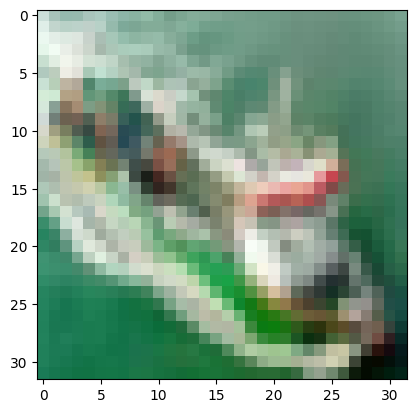

In [31]:
plot_img(one_img)

In [32]:
model.predict(one_img.reshape(1,32,32,3)).argmax()

1/1 [==============================] - 1s 874ms/step


8

In [33]:
Y_test[15]

array([8], dtype=uint8)

## HomeWork
- 1. Improve the test accuracy above 70%.
- 2. Test and predict and check for 10 random examples